In [1]:
!pip install seaborn
!pip install nltk
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [3]:
import os.path as path
from pyspark.sql import SparkSession
from pyspark.sql import column
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
from pyspark.ml.feature import StringIndexer, VectorAssembler,OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.mllib.util import MLUtils
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [4]:
def init_spark():
  return SparkSession \
        .builder \
        .appName("Big data project") \
        .config("spark.executor.memory", "16g") \
        .config("spark.driver.memory", "16g") \
        .getOrCreate()

spark = init_spark()

24/04/03 18:34:43 WARN Utils: Your hostname, DESKTOP-968IKC4 resolves to a loopback address: 127.0.1.1; using 172.31.102.226 instead (on interface eth0)
24/04/03 18:34:43 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/03 18:34:44 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/04/03 18:34:45 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/04/03 18:34:45 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [5]:
def get_data_dataframe(dir="final_dataset.csv"):
    # Specify the directory where the CSV files are saved
    csv_directory = dir
    
    # Read the CSV files back into a DataFrame
    final_df_read = spark.read.option("header", "true").option("multiline", "true").csv(csv_directory)
    
    # Add a random column to shuffle data randomly
    shuffled_df = final_df_read.withColumn("rand", rand())
    shuffled_df = shuffled_df.orderBy("rand")
    final_df_read = shuffled_df.drop("rand")
    return final_df_read



In [6]:
df=get_data_dataframe("final_dataset_all_imdb.csv").limit(20000)


In [7]:
df.columns

['movie_id',
 'movie_name',
 'genre',
 'description',
 'director',
 'actor1',
 'actor2',
 'actor3']

In [8]:
df.take(2)

[Row(movie_id='tt1464539', movie_name='House of Last Things', genre='horror', description='A mind-bending thriller set in Portland, Oregon about an unspoken tragedy and its effects on a house, its temporary caretakers and the owners, a classical music critic and his wife on a recuperative trip to Italy.', director='Michael Bartlett', actor1='Lindsey Haun', actor2='Blake Berris', actor3='RJ Mitte'),
 Row(movie_id='tt2926810', movie_name='ABCs of Death 2', genre='horror', description='Another 26-chapter anthology that showcases death in all its vicious wonder and brutal beauty.', director='Rodney Ascher, \nJulian Barratt, \nRobert Boocheck, \nAlejandro Brugués, \nKristina Buozyte, \nAlexandre Bustillo, \nLarry Fessenden, \nJulian Gilbey, \nJim Hosking, \nLancelot Oduwa Imasuen, \nE.L. Katz, \nAharon Keshales, \nSteven Kostanski, \nMarvin Kren, \nJuan Martínez Moreno, \nErik Matti, \nWolfgang Matzl, \nJulien Maury, \nRobert Morgan, \nChris Nash, \nVincenzo Natali, \nHajime Ohata, \nNavot 

In [9]:
# df.drop("director","actor2","actor3")

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stopword = set(stopwords.words('english'))

def preprocessing(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove specific characters #, @, and $
    text = re.sub(r'[#@\$]', '', text)
    
    # tokenize and convert to list
    tokens = word_tokenize(text)
    
    ## Lemmatize it 
    lemmatizer  = WordNetLemmatizer()
    
    ## lemmatize each token
   # text = [lemmatizer.lemmatize(token) for token in tokens]
    text = text.split()
    
    text = [word for word in text if word not in stopword]
    
    
    return " ".join(text) 

[nltk_data] Downloading package punkt to /home/umang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/umang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/umang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# pdd=df.toPandas()
# # pdd.drop_duplicates(inplace = True)
# # pdd.dropna( inplace = True )
# pdd.size

In [12]:
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer, IDF, StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier,RandomForestClassificationModel

In [13]:
# df=combined_train_df

In [14]:
# df
# 

In [15]:
# Remove duplicate rows
df = df.dropDuplicates()

# Remove rows with null values
# df_no_null = df_no_duplicates.dropna()


In [16]:
df.count()

20000

In [17]:
# df=df_no_duplicates

In [18]:
# df = df.select([sum (col(c).isNull().cast("int")).alias(c) for c in df.columns])

# # Show the count of null values for each column
# df.show()


In [19]:
df = df.dropna()

In [20]:
# df = df.select([sum (col(c).isNull().cast("int")).alias(c) for c in df.columns])

# # Show the count of null values for each column
# df.show()
# Tokenization, stop word removal, and TF-IDF transformation for text data
director_indexer = StringIndexer(inputCol="director", outputCol="director_indexed")
actor1_indexer = StringIndexer(inputCol="actor1", outputCol="actor1_indexed")
actor2_indexer = StringIndexer(inputCol="actor2", outputCol="actor2_indexed")
actor3_indexer = StringIndexer(inputCol="actor3", outputCol="actor3_indexed")

tokenizer = RegexTokenizer(inputCol="description", outputCol="words", pattern="\\W")
remover = StopWordsRemover(inputCol="words", outputCol="filtered_words")
vectorizer = CountVectorizer(inputCol="filtered_words", outputCol="raw_features")
idf = IDF(inputCol="raw_features", outputCol="description_clean")

# Encoding genre labels
genre_indexer = StringIndexer(inputCol="genre", outputCol="label")

assembler = VectorAssembler(inputCols=["description_clean"], outputCol="features")


pipeline = Pipeline(stages=[director_indexer,actor1_indexer,actor2_indexer,actor3_indexer,tokenizer,remover,vectorizer, idf,genre_indexer,assembler])
transformed_df = pipeline.fit(df).transform(df)
# Combine the preprocessed text features with the genre labels
# combined_train_df = genre_indexer.fit(transformed_train_df).transform(transformed_train_df)


In [21]:
df=transformed_df

In [22]:
# Split the data into training and testing sets
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)

# Show the number of rows in each set
print("Training set count:", train_df.count())
print("Testing set count:", test_df.count())

24/04/03 18:34:54 WARN DAGScheduler: Broadcasting large task binary with size 4.4 MiB


Training set count: 15325


24/04/03 18:34:55 WARN DAGScheduler: Broadcasting large task binary with size 4.4 MiB


Testing set count: 3760


24/04/03 18:34:56 WARN DAGScheduler: Broadcasting large task binary with size 4.4 MiB


+---------+-----+
|    genre|count|
+---------+-----+
|    crime| 3114|
|adventure| 2968|
|   action| 3089|
|  romance| 3067|
|   horror| 3087|
+---------+-----+



24/04/03 18:34:57 WARN DAGScheduler: Broadcasting large task binary with size 4.4 MiB


       genre  count
0      crime   3114
1  adventure   2968
2     action   3089
3    romance   3067
4     horror   3087


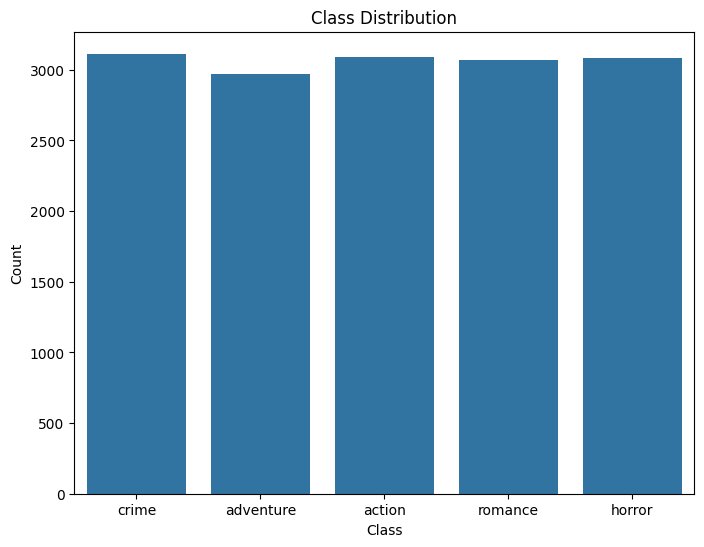

24/04/03 18:34:58 WARN DAGScheduler: Broadcasting large task binary with size 4.4 MiB


+---------+-----+
|    genre|count|
+---------+-----+
|    crime|  759|
|   action|  744|
|adventure|  754|
|  romance|  743|
|   horror|  760|
+---------+-----+



24/04/03 18:34:58 WARN DAGScheduler: Broadcasting large task binary with size 4.4 MiB


       genre  count
0      crime    759
1     action    744
2  adventure    754
3    romance    743
4     horror    760


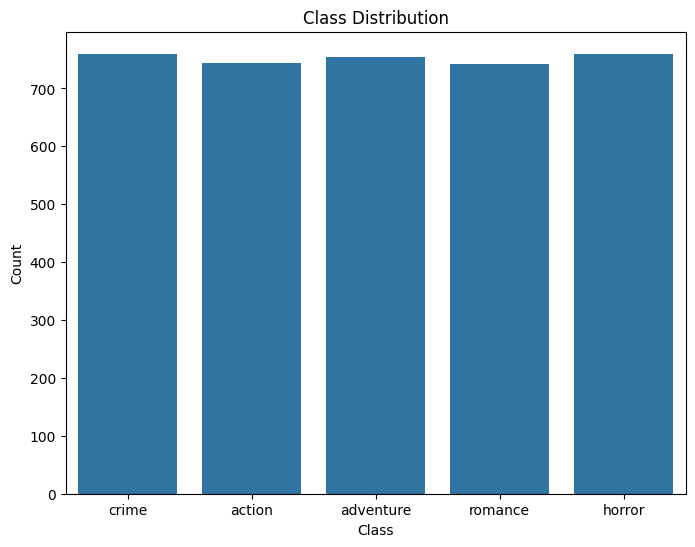

In [23]:
def print_class_distribution(df):
    # Group the DataFrame by the "genre" column and count the occurrences of each genre
    genre_counts = df.groupBy("genre").count()
    # Show the genre counts
    genre_counts.show()
    class_counts = genre_counts.toPandas()
    print(class_counts)
    plt.figure(figsize=(8, 6))
    sns.barplot(x="genre", y="count", data=class_counts)
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()
    

# def show_class_frequency_distribution(df):
#        # Plot class distribution
#     plt.figure(figsize=(8, 6))
#     sns.barplot(x="class", y="count", data=class_counts)
#     plt.title("Class Distribution")
#     plt.xlabel("Class")
#     plt.ylabel("Count")
#     plt.show()
#     plt.savefig(plots_dir + '/class_distribution.jpeg', dpi=300, bbox_inches='tight')
    #plt.show()
print_class_distribution(train_df)
print_class_distribution(test_df)

In [24]:
df

DataFrame[movie_id: string, movie_name: string, genre: string, description: string, director: string, actor1: string, actor2: string, actor3: string, director_indexed: double, actor1_indexed: double, actor2_indexed: double, actor3_indexed: double, words: array<string>, filtered_words: array<string>, raw_features: vector, description_clean: vector, label: double, features: vector]

In [25]:
# show_class_frequency_distribution("./

In [26]:
def print_and_return_mapping_of_index_to_label(df,predicting='genre'):
    # Collect distinct pairs of (label, genre)
    label_genre_mapping = df.select("label", predicting).distinct().collect()
    map={}
    # Print the mapping
    for mapping in label_genre_mapping:
        print("Label %s is mapped to genre '%s'" % (mapping.label, mapping.genre))
        map[mapping.label]= mapping.genre
    return map

In [27]:
mapping=print_and_return_mapping_of_index_to_label(df)

Label 1.0 is mapped to genre 'horror'
Label 0.0 is mapped to genre 'crime'
Label 4.0 is mapped to genre 'adventure'
Label 3.0 is mapped to genre 'romance'
Label 2.0 is mapped to genre 'action'


In [28]:
mapping

{1.0: 'horror', 0.0: 'crime', 4.0: 'adventure', 3.0: 'romance', 2.0: 'action'}

In [31]:
# Train the model
# model = pipeline.fit(train_df)
# Define the Random Forest classifier
dt_classifier = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxBins=60000)



# Make predictions
# predictions = model.transform(test_df)

In [32]:
# # Train the Random Forest classifier
# model = dt_classifier.fit(df)

In [33]:
# rfc_path = "models/rfc"

# rfc_model_path = "models/rfc_model"


In [34]:
# rf_classifier.save(rfc_path)
# model.save(rfc_model_path)

In [35]:
# model = RandomForestClassificationModel.load(rfc_model_path)

In [36]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

24/04/03 18:35:28 WARN DAGScheduler: Broadcasting large task binary with size 3.3 MiB
24/04/03 18:35:31 WARN DAGScheduler: Broadcasting large task binary with size 3.3 MiB


In [39]:
# Create ParamGrid for Cross Validation
rfparamGrid = (ParamGridBuilder()
             .addGrid(dt_classifier.maxDepth, [2, 5, 10])
             .addGrid(dt_classifier.maxBins, [30000,40000,35000])
             .build())

# Create 5-fold CrossValidator
rfcv = CrossValidator(estimator = dt_classifier,
                      estimatorParamMaps = rfparamGrid,
                      evaluator = evaluator,
                      numFolds = 5)

In [41]:
cv_model = rfcv.fit(train_df)


24/04/03 18:40:25 WARN CacheManager: Asked to cache already cached data.
24/04/03 18:40:25 WARN CacheManager: Asked to cache already cached data.
24/04/03 18:40:25 WARN DAGScheduler: Broadcasting large task binary with size 4.5 MiB
24/04/03 18:40:25 WARN DAGScheduler: Broadcasting large task binary with size 4.5 MiB
24/04/03 18:40:25 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 30000 to 12284 (= number of training instances)
24/04/03 18:40:25 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
24/04/03 18:40:30 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB
24/04/03 18:40:34 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB
24/04/03 18:40:35 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB
24/04/03 18:40:36 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB
24/04/03 18:40:37 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB
24/04/03 18:40:37 WARN DAGScheduler: B

In [42]:
best_dt_model = cv_model.bestModel

In [43]:
best_dt_model

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_364f0c1d2b9f, depth=10, numNodes=225, numClasses=5, numFeatures=27999

In [44]:
best_dt_model.featureImportances

SparseVector(27999, {0: 0.003, 3: 0.0006, 4: 0.0039, 6: 0.0028, 7: 0.002, 8: 0.0027, 9: 0.2846, 11: 0.0051, 12: 0.0017, 13: 0.0061, 14: 0.0011, 15: 0.0082, 16: 0.0013, 17: 0.004, 20: 0.0008, 21: 0.0793, 22: 0.0038, 23: 0.0028, 24: 0.0023, 25: 0.0434, 27: 0.0008, 29: 0.0011, 31: 0.0024, 32: 0.0013, 37: 0.0008, 39: 0.0013, 43: 0.0481, 47: 0.0015, 48: 0.0028, 51: 0.001, 54: 0.0068, 55: 0.0619, 56: 0.0052, 59: 0.0012, 63: 0.0043, 65: 0.0034, 66: 0.0018, 71: 0.0049, 85: 0.0345, 86: 0.002, 89: 0.0011, 90: 0.0029, 93: 0.0042, 100: 0.0016, 104: 0.005, 120: 0.0031, 123: 0.001, 128: 0.0016, 145: 0.0028, 150: 0.044, 152: 0.0019, 164: 0.0011, 166: 0.0018, 179: 0.0018, 183: 0.0364, 185: 0.0041, 187: 0.005, 197: 0.0018, 200: 0.0012, 204: 0.0038, 207: 0.0016, 211: 0.004, 220: 0.0607, 228: 0.0728, 249: 0.0038, 250: 0.0014, 267: 0.0028, 273: 0.0029, 297: 0.0018, 338: 0.0036, 345: 0.004, 346: 0.0049, 358: 0.004, 462: 0.0035, 510: 0.0053, 514: 0.0018, 519: 0.0021, 538: 0.0025, 586: 0.0019, 734: 0.0032, 7

In [45]:
predictions = best_dt_model.transform(test_df)
accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = {:.2f}".format(accuracy))

24/04/03 18:59:05 WARN DAGScheduler: Broadcasting large task binary with size 4.5 MiB


Test set accuracy = 0.30


In [46]:
predictions.select("genre","label","prediction").head(30)

24/04/03 18:59:22 WARN DAGScheduler: Broadcasting large task binary with size 4.5 MiB


[Row(genre='crime', label=0.0, prediction=0.0),
 Row(genre='action', label=2.0, prediction=4.0),
 Row(genre='adventure', label=4.0, prediction=3.0),
 Row(genre='adventure', label=4.0, prediction=4.0),
 Row(genre='adventure', label=4.0, prediction=4.0),
 Row(genre='adventure', label=4.0, prediction=4.0),
 Row(genre='crime', label=0.0, prediction=4.0),
 Row(genre='adventure', label=4.0, prediction=4.0),
 Row(genre='adventure', label=4.0, prediction=0.0),
 Row(genre='action', label=2.0, prediction=4.0),
 Row(genre='adventure', label=4.0, prediction=4.0),
 Row(genre='romance', label=3.0, prediction=4.0),
 Row(genre='adventure', label=4.0, prediction=4.0),
 Row(genre='adventure', label=4.0, prediction=4.0),
 Row(genre='horror', label=1.0, prediction=4.0),
 Row(genre='horror', label=1.0, prediction=4.0),
 Row(genre='adventure', label=4.0, prediction=4.0),
 Row(genre='crime', label=0.0, prediction=3.0),
 Row(genre='crime', label=0.0, prediction=0.0),
 Row(genre='romance', label=3.0, predictio

In [47]:


def print_statistis(predictions):

    # Compute raw scores on the test set
    predictionAndLabels = predictions.rdd.map(lambda lp: (lp.prediction, lp.label))
    
    # Instantiate metrics object
    metrics = MulticlassMetrics(predictionAndLabels)
    confusion_matrix = metrics.confusionMatrix().toArray()
    
    # Overall statistics
    precision = metrics.precision(1.0)
    recall = metrics.recall(1.0)
    f1Score = metrics.fMeasure(1.0)
    total_predictions = confusion_matrix.sum(axis=1)
    print("Summary Stats")
    print("Precision = %s" % precision)
    print("Recall = %s" % recall)
    print("F1 Score = %s" % f1Score)
    
    # Statistics by class
    labels = predictions.rdd.map(lambda lp: lp.label).distinct().collect()
    accuracies = {}
    for label in sorted(labels):
        # print("______________________"+mapping[label]+"_____________________")
        print("Class %s precision = %s" % (label, metrics.precision(label)))
        print("Class %s recall = %s" % (label, metrics.recall(label)))
        print("Class %s F1 Measure = %s" % (label, metrics.fMeasure(label, beta=1.0)))
        
    
    # Calculate the accuracy for each label
    print(total_predictions)
    for label in range(len(total_predictions)):
        correct_predictions = confusion_matrix[label, label]
        accuracy = correct_predictions / total_predictions[label]
        accuracies[label] = accuracy
    
    # Print accuracies for each label
    for label, accuracy in accuracies.items():
        print("Accuracy for label %s: %s" % (label, accuracy))


In [48]:
print_statistis(predictions)


/home/umang/.local/lib/python3.10/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
24/04/03 18:59:27 WARN DAGScheduler: Broadcasting large task binary with size 4.5 MiB
24/04/03 18:59:28 WARN DAGScheduler: Broadcasting large task binary with size 4.5 MiB
24/04/03 19:00:35 WARN DAGScheduler: Broadcasting large task binary with size 4.5 MiB


Summary Stats
Precision = 0.6474820143884892
Recall = 0.11842105263157894
F1 Score = 0.20022246941045604


Class 0.0 precision = 0.5032467532467533
Class 0.0 recall = 0.20421607378129117
Class 0.0 F1 Measure = 0.29053420805998126
Class 1.0 precision = 0.6474820143884892
Class 1.0 recall = 0.11842105263157894
Class 1.0 F1 Measure = 0.20022246941045604
Class 2.0 precision = 0.2916666666666667
Class 2.0 recall = 0.028225806451612902
Class 2.0 F1 Measure = 0.051470588235294115
Class 3.0 precision = 0.6228813559322034
Class 3.0 recall = 0.19784656796769853
Class 3.0 F1 Measure = 0.30030643513789584
Class 4.0 precision = 0.23494176372712147
Class 4.0 recall = 0.9363395225464191
Class 4.0 F1 Measure = 0.3756318169725991
[759. 760. 744. 743. 754.]
Accuracy for label 0: 0.20421607378129117
Accuracy for label 1: 0.11842105263157894
Accuracy for label 2: 0.028225806451612902
Accuracy for label 3: 0.19784656796769853
Accuracy for label 4: 0.9363395225464191


In [49]:
predictionAndLabels = predictions.rdd.map(lambda lp: (lp.prediction, lp.label))
    
    # Instantiate metrics object
metrics = MulticlassMetrics(predictionAndLabels)
confusion_matrix = metrics.confusionMatrix().toArray()
# confusion_matrix_pd = confusion_matrix.toPandas()

# Create the confusion matrix plot using Seaborn


24/04/03 19:01:42 WARN DAGScheduler: Broadcasting large task binary with size 4.5 MiB
24/04/03 19:01:43 WARN DAGScheduler: Broadcasting large task binary with size 4.5 MiB


In [50]:
confusion_matrix_df = pd.DataFrame(confusion_matrix, index=[mapping[i] for i in range(confusion_matrix.shape[0])], columns=[mapping[i] for i in range(confusion_matrix.shape[1])])


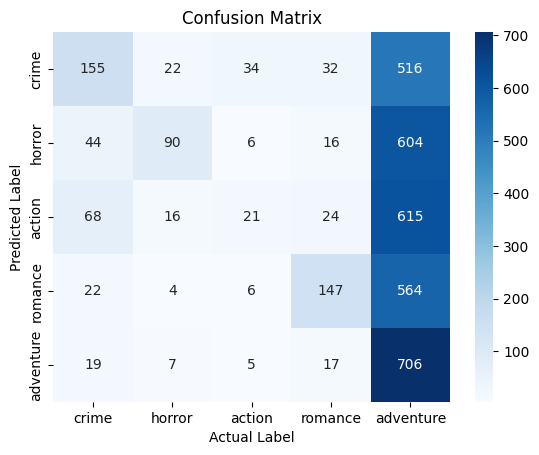

In [51]:
sns.heatmap(confusion_matrix_df, annot=True, fmt="g", cmap="Blues")

# Add labels and title
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix")

# Show plot
plt.show()

In [55]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

# Scala version implements .roc() and .pr()
# Python: https://spark.apache.org/docs/latest/api/python/_modules/pyspark/mllib/common.html
# Scala: https://spark.apache.org/docs/latest/api/java/org/apache/spark/mllib/evaluation/BinaryClassificationMetrics.html
class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        points = []
        # Note this collect could be inefficient for large datasets 
        # considering there may be one probability per datapoint (at most)
        # The Scala version takes a numBins parameter, 
        # but it doesn't seem possible to pass this from Python to Java
        for row in rdd.collect():
            # Results are returned as type scala.Tuple2, 
            # which doesn't appear to have a py4j mapping
            points += [(float(row._1()), float(row._2()))]
        return points

    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)

24/04/03 19:15:54 WARN DAGScheduler: Broadcasting large task binary with size 4.5 MiB
24/04/03 19:15:54 WARN DAGScheduler: Broadcasting large task binary with size 4.5 MiB


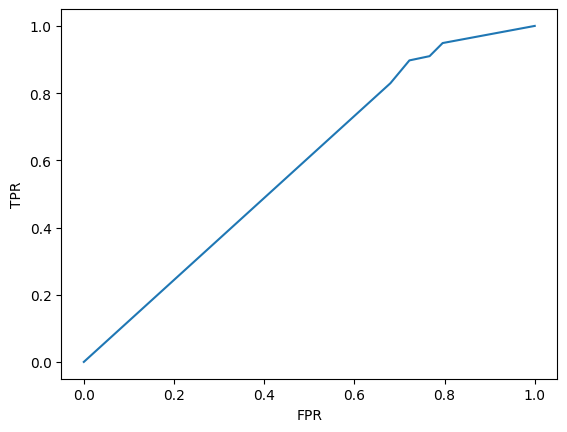

In [58]:

# Returns as a list (false positive rate, true positive rate)
preds = predictions.select('label','prediction').rdd.map(lambda row: (float(row['prediction']), float(row['label'])))
points = CurveMetrics(preds).get_curve('roc')

plt.figure()
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
# plt.title(title)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(x_val, y_val)